## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 021E

In [1]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import math as m
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../Data/Sickness05.csv'
fileFullName = os.path.abspath(fileName)
sickdf= pd.read_csv(fileFullName, header=0)
print(sickdf.shape)
print(sickdf.columns)

(442, 16)
Index(['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10',
       'F11', 'F12', 'T01', 'T02', 'T03', 'T'],
      dtype='object')


In [3]:
sickness_data = np.array(sickdf[['F01', 'F02']].copy(deep=True))
sickness_target = np.array(sickdf['T'].copy(deep=True))

In [4]:
X = np.array(sickness_data)
y = np.array(sickness_target)
print(X.shape)
print(y.shape)

(442, 2)
(442,)


In [5]:
clf1 = NearestCentroid(metric='euclidean', shrink_threshold=None)
clf1.fit(X, y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [6]:
CX=clf1.centroids_
print(CX)
Cy=clf1.predict(CX)
print(Cy)

[[-0.04299084 -0.00830612]
 [ 0.03618396  0.00699098]]
[0 1]


In [7]:
imin=int(CX[0][0]*10000)
imax=int(CX[1][0]*10000)
istep=10
print(imin,imax, istep)
print((imax-imin)/istep)

jmin=int(CX[0][1]*10000)
jmax=int(CX[1][1]*10000)
jstep=5
print(jmin,jmax, jstep)
print((jmax-jmin)/jstep)

-429 361 10
79.0
-83 69 5
30.4


In [8]:
t=0
for i in range(imin,imax,istep):
    for j in range(jmin,jmax,jstep):
        xr=i/2500
        yr=j/1000
        pr=int(clf1.predict([[xr, yr]]))
        r=np.array([xr,yr,pr])
        t+=1
        if t==1:
            Z=np.array([r])
        else:
            Z=np.append(Z, [r], axis=0)
        #print('X=%5.2f Y=%5.2f p=%5.2f' % (xr,yr,pr))

In [9]:
print(Z.shape)

(2449, 3)


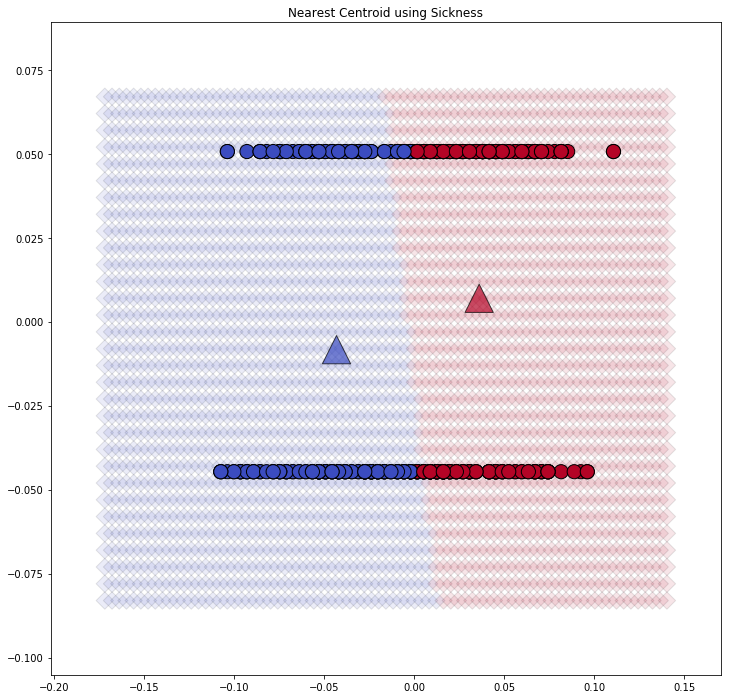

In [10]:
MLName='Nearest Centroid using Sickness'
fig=plt.figure(figsize=(12, 12))
ax = fig.subplots(1, 1)
plt.title(MLName)
Z0, Z1, Z2 = Z[:, 0], Z[:, 1], Z[:, 2]
ax.scatter(Z0, Z1, c=Z2, cmap=plt.cm.coolwarm, s=150, edgecolors='k', marker='D', alpha=0.1)

X0, X1 = X[:, 0], X[:, 1]
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=200, edgecolors='k', marker='o', alpha=1.0)

C0, C1 = CX[:, 0], CX[:, 1]
ax.scatter(C0, C1, c=Cy, cmap=plt.cm.coolwarm, s=800, edgecolors='k', marker='^', alpha=0.7)

plt.show()

In [11]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
graphName = 'Chapter-004-Example-021-05.jpg'
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',graphName])
fig.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [12]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-09 18:07:30.048063
